In [4]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file to examine its contents
file_path = 'anonim-clean.csv'
data = pd.read_csv(file_path)
# Let's start by examining the unique imaging characteristics and treatment decisions to understand their relationship
# Extracting relevant columns for imaging characteristics and treatment decisions

imaging_treatment_data = data[['caracteristici imagistice', 'tratament']].dropna()

# Exploring unique imaging characteristics and treatment types
unique_imaging_characteristics = imaging_treatment_data['caracteristici imagistice'].unique()
unique_treatments = imaging_treatment_data['tratament'].unique()

# Displaying the unique values for imaging characteristics and treatments
unique_imaging_characteristics, unique_treatments
# Define function to generate new data based on identified trends
def generate_new_entries(n):
    new_entries = []
    
    for _ in range(n):
        # Randomly select imaging characteristics and associated treatment
        imaging_characteristic = random.choice(unique_imaging_characteristics)
        
        # Define treatment decision logic based on the imaging characteristic
        if 'fracturi' in imaging_characteristic or 'abces' in imaging_characteristic:
            treatment = 'chirurgical, antibioterapie'
        elif 'eroziuni' in imaging_characteristic and 'edem' in imaging_characteristic:
            treatment = 'antialgoterapie, antibioterapie'
        elif 'cardiomegalie' in imaging_characteristic:
            treatment = 'antialgoterapie, antibioterapie, ventilație_mecanică'
        else:
            treatment = random.choice(unique_treatments)
        
        # Generate a new entry with the selected imaging characteristic and treatment
        new_entries.append({
            'caracteristici imagistice': imaging_characteristic,
            'tratament': treatment
        })
    
    return pd.DataFrame(new_entries)

# Generate 50 new entries
new_data = generate_new_entries(50)
new_data.head()  # Display the first few generated entries
# Save the new data to a CSV file
output_path = 'new_imaging_treatment_data.csv'
new_data.to_csv(output_path, index=False)

# Provide the path to the user
output_path


'new_imaging_treatment_data.csv'

In [5]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Încărcăm datele originale
data = pd.read_csv('anonim-clean.csv')

# Funcție pentru a genera date pentru toate coloanele
def generate_new_entries(n):
    new_entries = []
    
    for _ in range(n):
        entry = {}
        
        # id_anonimizat
        entry['id_anonimizat'] = random.randint(1000, 9999)
        
        # data internării
        start_date = datetime(2022, 1, 1)
        end_date = datetime(2024, 12, 31)
        random_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
        entry['data internării'] = random_date.strftime('%Y-%m-%d %H:%M:%S')
        
        # vârstă
        entry['vârstă'] = random.randint(30, 90)
        
        # gen
        entry['gen'] = random.choice(['m', 'f'])
        
        # prezentare
        prezentari = ['lombosciatalgie', 'rahialgie', 'tulburări_de_mers', 'colică_abdominală', 'febră', 'paraplegie']
        entry['prezentare'] = ', '.join(random.sample(prezentari, random.randint(1, 3)))
        
        # app (antecedente personale patologice)
        app_options = ['hta', 'dz_ii', 'brc', 'icc', 'obezitate', 'fia', 'bpoc']
        entry['app'] = ', '.join(random.sample(app_options, random.randint(0, 3)))
        
        # metodă imagistică
        metode_imagistice = ['ct', 'rm', 'rx']
        entry['metodă imagistică'] = ', '.join(random.sample(metode_imagistice, random.randint(1, 3)))
        
        # segment
        segmente = ['l1', 'l2', 'l3', 'l4', 'l5', 's1', 't12', 't11']
        entry['segment'] = ', '.join(random.sample(segmente, random.randint(1, 3)))
        
        # caracteristici imagistice
        caracteristici = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară', 'fracturi', 'abces']
        entry['caracteristici imagistice'] = ', '.join(random.sample(caracteristici, random.randint(1, 4)))
        
        # contrast
        entry['contrast'] = random.choice([True, False])
        
        # biopsie
        entry['biopsie'] = random.choice([True, False])
        
        # diagnostic histopatologic
        if entry['biopsie']:
            diagnostice = ['bacteriologic', 'osteodiscită cronică nespecifică', 'abces epidural']
            entry['diagnostic histopatologic'] = random.choice(diagnostice)
        else:
            entry['diagnostic histopatologic'] = ''
        
        # agent inflamator
        if entry['biopsie'] and entry['diagnostic histopatologic'] == 'bacteriologic':
            agenti = ['negativ', 'stafilococcus_aureus', 'escherichia_coli', 'pseudomonas_aeruginosa']
            entry['agent inflamator'] = random.choice(agenti)
        else:
            entry['agent inflamator'] = ''
        
        # tratament
        if 'fracturi' in entry['caracteristici imagistice'] or 'abces' in entry['caracteristici imagistice']:
            entry['tratament'] = 'chirurgical, antibioterapie'
        elif 'eroziuni' in entry['caracteristici imagistice'] and 'edem' in entry['caracteristici imagistice']:
            entry['tratament'] = 'antialgoterapie, antibioterapie'
        else:
            tratamente = ['antialgoterapie', 'antibioterapie', 'chirurgical', 'ventilație_mecanică']
            entry['tratament'] = ', '.join(random.sample(tratamente, random.randint(1, 3)))
        
        # protocol operator
        if 'chirurgical' in entry['tratament']:
            protocoale = ['decompresie', 'laminectomie', 'drenaj', 'rahisinteză']
            entry['protocol operator'] = ', '.join(random.sample(protocoale, random.randint(1, 3)))
        else:
            entry['protocol operator'] = ''
        
        # complicații
        complicatii = ['', 'sepsis', 'stop_cardio-respirator', 'acumulări_lichidiene']
        entry['complicații'] = random.choice(complicatii)
        
        # evoluție
        evolutii = ['favorabilă', 'lent_favorabilă', 'nefavorabilă']
        entry['evoluție'] = random.choice(evolutii)
        
        # reevaluare
        entry['reevaluare'] = random.choice([True, False])
        
        # recidivă
        entry['recidivă'] = random.choice([True, False])
        
        # parametri de laborator
        entry['crp (0 - 1 mg/dl)'] = round(random.uniform(0, 50), 2)
        entry['vsh (5 - 10 mm/h)'] = round(random.uniform(5, 80), 1)
        entry['wbc * 10*3/ul (3.6 - 11.8)'] = round(random.uniform(3, 20), 1)
        
        # exitus
        if entry['evoluție'] == 'nefavorabilă':
            entry['exitus'] = random.choice([True, False])
        else:
            entry['exitus'] = False
        
        new_entries.append(entry)
    
    return pd.DataFrame(new_entries)

# Generăm 100 de noi intrări
new_data = generate_new_entries(100)

# Concatenăm datele noi cu cele originale
combined_data = pd.concat([data, new_data], ignore_index=True)

# Afișăm primele câteva rânduri din datele combinate pentru verificare
print(combined_data.head())

# Salvăm datele combinate într-un nou fișier CSV
combined_data.to_csv('spondilodiscite_date_extinse.csv', index=False)

print("Datele extinse au fost salvate în 'spondilodiscite_date_extinse.csv'")

   id_anonimizat      data internării  vârstă gen  \
0              2  2024-01-03 17:03:00      58   f   
1             30  2023-07-15 21:20:00      74   m   
2             39  2023-10-02 10:24:00      73   m   
3             22  2024-05-13 08:16:00      74   f   
4             32  2023-12-31 18:34:00      54   m   

                      prezentare  \
0  colică_abdominală, sepsis_obs   
1                lombosciatalgie   
2                lombosciatalgie   
3   rahialgie, tulburări_de_mers   
4                lombosciatalgie   

                                                 app metodă imagistică  \
0                                         brc, dz_ii                ct   
1                                           icc, hta                ct   
2                                                hta                ct   
3  tiroidectomie, dz_ii, hta, sdr_gerhardt, trahe...            ct, rm   
4                                                NaN            ct, rm   

   segment         

In [6]:
# Anonim - fake data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

In [7]:
# Load the data
df = pd.read_csv('anonim-fake.csv')

In [8]:
# Age statistics
age_stats = df['vârstă'].describe()
print("Age Statistics:")
print(age_stats)

Age Statistics:
count    196.000000
mean      62.188776
std       14.904485
min       30.000000
25%       51.500000
50%       63.000000
75%       73.000000
max       90.000000
Name: vârstă, dtype: float64


In [9]:
# Imaging modality frequency
imaging_modalities = df['metodă imagistică'].str.split(', ', expand=True).stack().value_counts()
print("\nImaging Modality Frequency:")
print(imaging_modalities)


Imaging Modality Frequency:
rm     146
ct     115
rx     102
eco     10
rmn      4
Name: count, dtype: int64


Intervale de încredere de 95% pentru coeficienții caracteristicilor imagistice:
eroziuni: (-0.7761, 0.3951)
tasări: (-0.3013, 0.9013)
edem: (-1.1123, 0.0852)
colecții: (-0.5549, 0.5483)
stenoză: (-0.7146, 0.4988)
amprentare_medulară: (-0.1047, 1.2440)


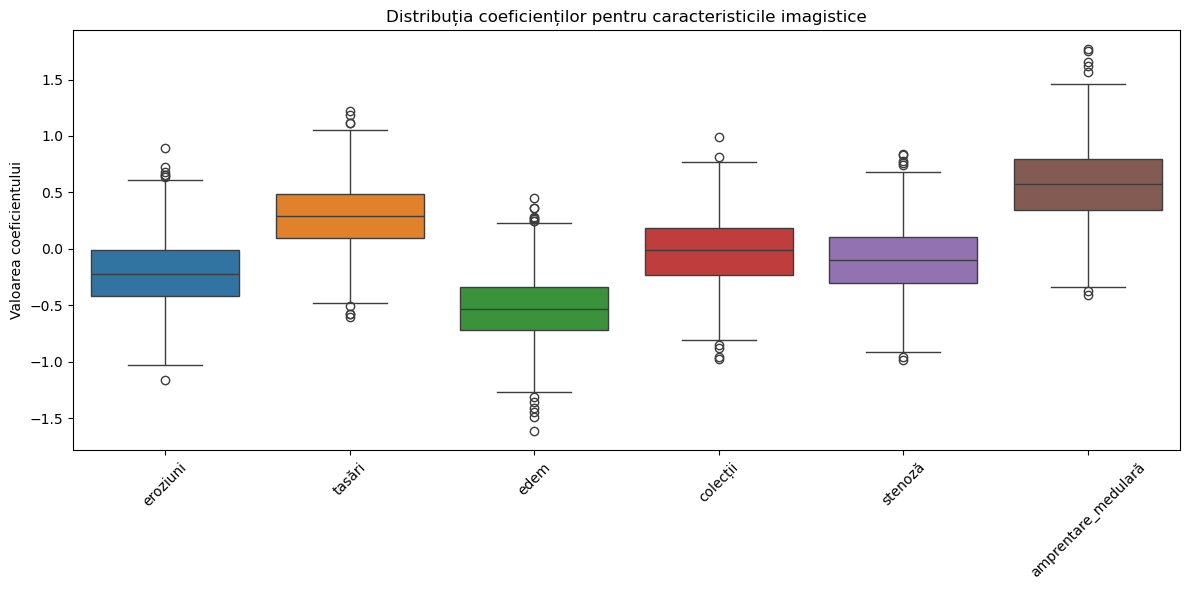

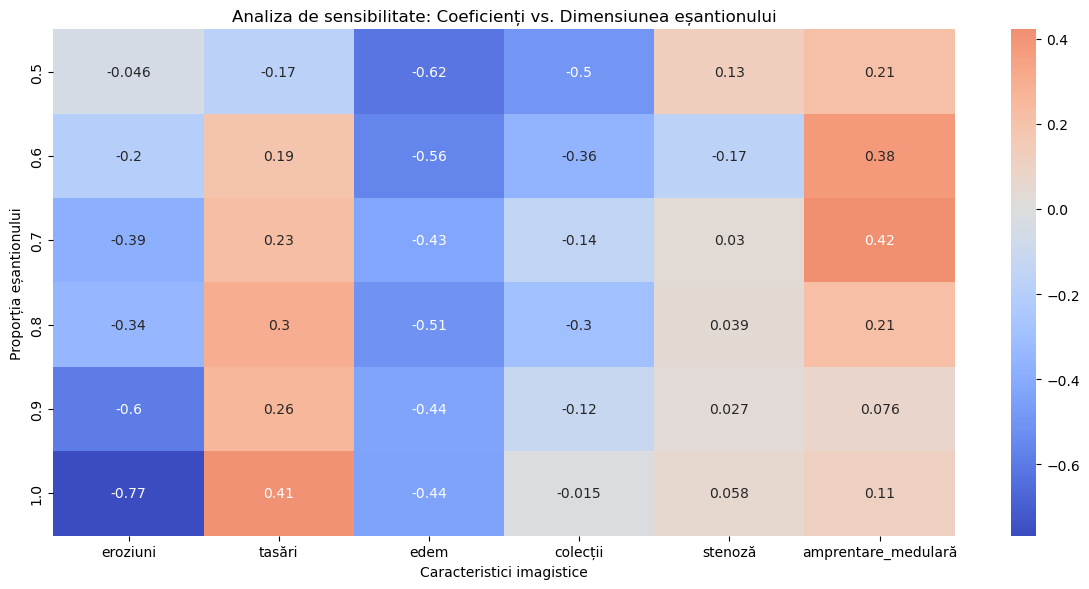

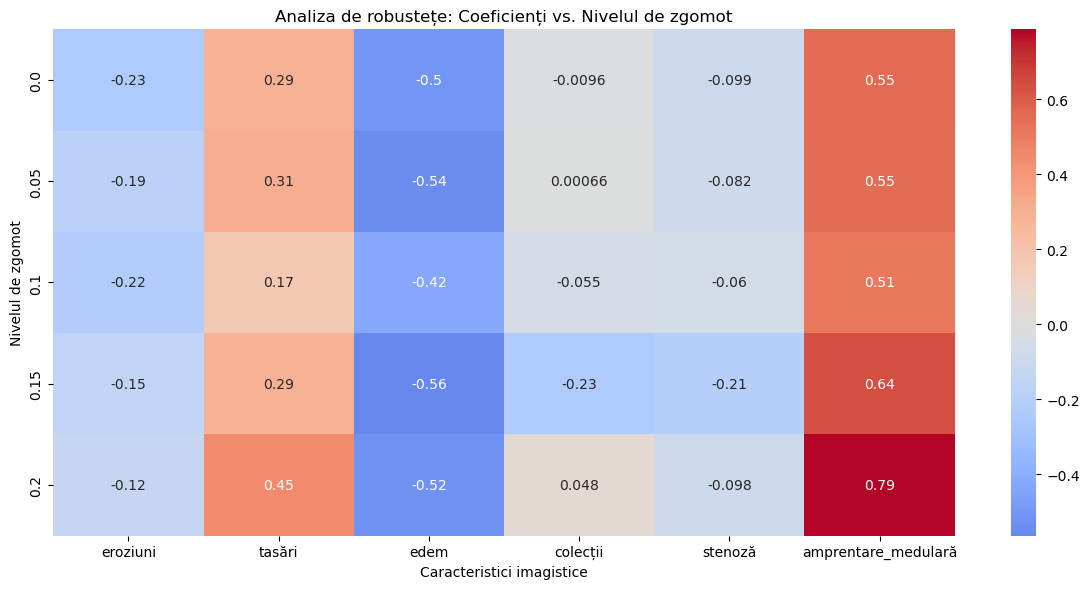

In [10]:
from sklearn.utils import resample
import seaborn as sns
# Prelucrăm caracteristicile imagistice
caracteristici = ['eroziuni', 'tasări', 'edem', 'colecții', 'stenoză', 'amprentare_medulară']

for caracteristica in caracteristici:
    df[caracteristica] = df['caracteristici imagistice'].str.contains(caracteristica, na=False).astype(int)

# Pregătim datele pentru analiză
df['tratament_chirurgical'] = df['tratament'].str.contains('chirurgical', na= False).astype(int)
X = df[caracteristici]
y = df['tratament_chirurgical']

# Funcție pentru a obține coeficienții modelului
def get_coefficients(X, y):
    model = LogisticRegression(random_state=42)
    model.fit(X, y)
    return model.coef_[0]

# Efectuăm analiza de sensibilitate folosind bootstrap
n_iterations = 1000
n_samples = len(X)

# Inițializăm o matrice pentru a stoca rezultatele bootstrap
bootstrap_results = np.zeros((n_iterations, len(caracteristici)))

for i in range(n_iterations):
    # Generăm un eșantion bootstrap
    X_resampled, y_resampled = resample(X, y, n_samples=n_samples, random_state=i)
    
    # Obținem coeficienții pentru acest eșantion
    bootstrap_results[i, :] = get_coefficients(X_resampled, y_resampled)

# Calculăm intervalele de încredere de 95% pentru coeficienți
confidence_intervals = np.percentile(bootstrap_results, [2.5, 97.5], axis=0)

# Afișăm rezultatele
print("Intervale de încredere de 95% pentru coeficienții caracteristicilor imagistice:")
for i, caracteristica in enumerate(caracteristici):
    print(f"{caracteristica}: ({confidence_intervals[0, i]:.4f}, {confidence_intervals[1, i]:.4f})")

# Vizualizăm distribuția coeficienților
plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.DataFrame(bootstrap_results, columns=caracteristici))
plt.title("Distribuția coeficienților pentru caracteristicile imagistice")
plt.ylabel("Valoarea coeficientului")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analiza de sensibilitate pentru diferite dimensiuni ale eșantionului
sample_sizes = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
sensitivity_results = []

for size in sample_sizes:
    n_samples = int(len(X) * size)
    X_sample, y_sample = resample(X, y, n_samples=n_samples, random_state=42)
    coefficients = get_coefficients(X_sample, y_sample)
    sensitivity_results.append(coefficients)

# Vizualizăm rezultatele analizei de sensibilitate
plt.figure(figsize=(12, 6))
sensitivity_df = pd.DataFrame(sensitivity_results, index=sample_sizes, columns=caracteristici)
sns.heatmap(sensitivity_df, annot=True, cmap="coolwarm", center=0)
plt.title("Analiza de sensibilitate: Coeficienți vs. Dimensiunea eșantionului")
plt.xlabel("Caracteristici imagistice")
plt.ylabel("Proporția eșantionului")
plt.tight_layout()
plt.show()

# Testăm robustețea rezultatelor prin adăugarea de zgomot
noise_levels = [0, 0.05, 0.1, 0.15, 0.2]
noise_results = []

for noise in noise_levels:
    X_noisy = X + np.random.normal(0, noise, X.shape)
    coefficients = get_coefficients(X_noisy, y)
    noise_results.append(coefficients)

# Vizualizăm rezultatele testului de robustețe
plt.figure(figsize=(12, 6))
noise_df = pd.DataFrame(noise_results, index=noise_levels, columns=caracteristici)
sns.heatmap(noise_df, annot=True, cmap="coolwarm", center=0)
plt.title("Analiza de robustețe: Coeficienți vs. Nivelul de zgomot")
plt.xlabel("Caracteristici imagistice")
plt.ylabel("Nivelul de zgomot")
plt.tight_layout()
plt.show()